# End to End Project

## Get the Data

In [2]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

In [3]:
# get the data
url = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv'
response = requests.get(url)

if response.status_code == 200:
  data = pd.read_csv(url)
  print('Data is loaded')
else:
  print('Data is failed to load',response.status_code)

Data is loaded


## Discover and Visualize

In [4]:
#Discover your data
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


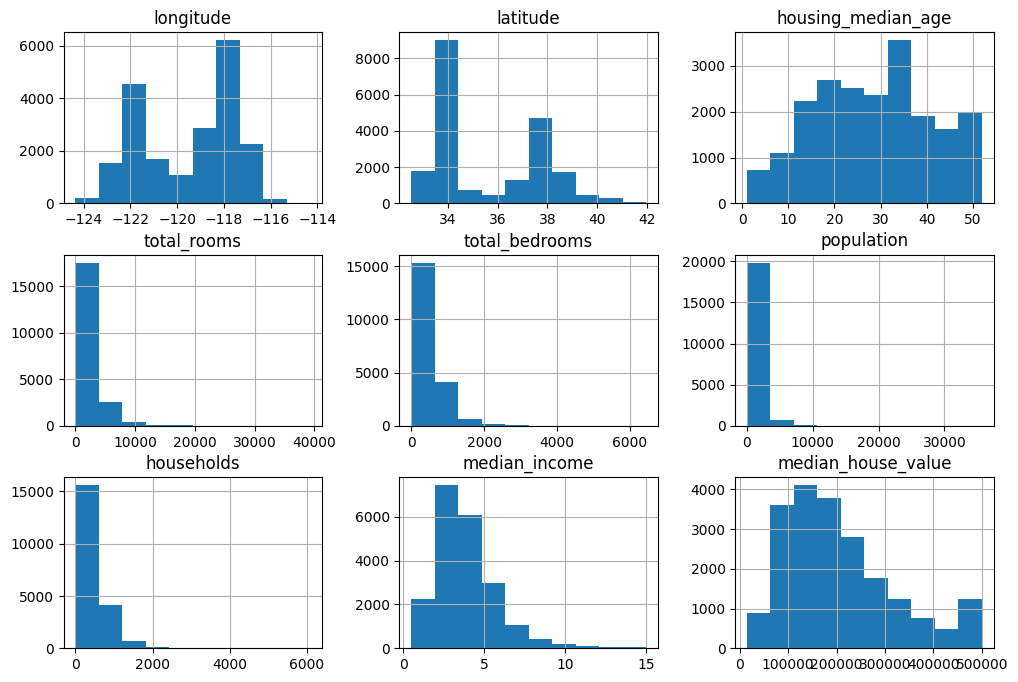

In [7]:
data.hist(figsize=(12,8))
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

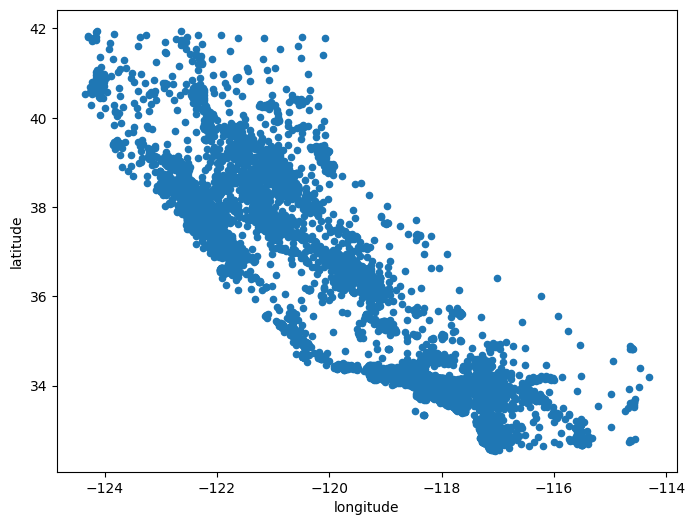

In [8]:
data.plot(kind='scatter',
         x='longitude',
         y='latitude',
         figsize=(8,6))

<Axes: xlabel='longitude', ylabel='latitude'>

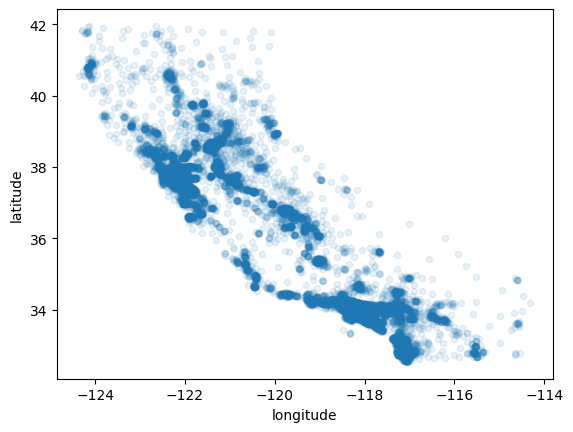

In [9]:
data.plot(kind='scatter',
          x='longitude',
          y='latitude',
          alpha=0.1)

<Axes: xlabel='longitude', ylabel='latitude'>

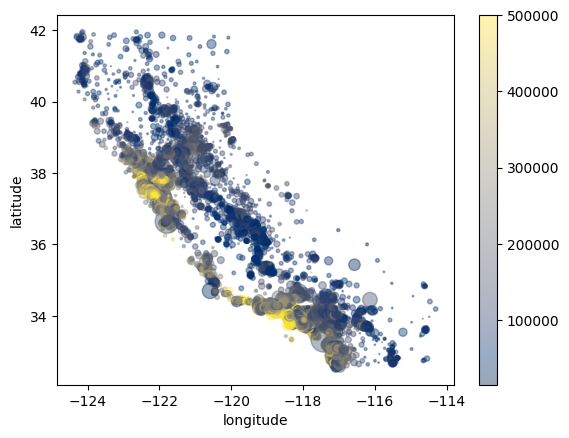

In [10]:
data.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,
          s=data['population']/100,c=data['median_house_value'],cmap=plt.get_cmap('cividis'),colorbar=True)

In [11]:
corr_matrix = data.corr()

corr_matrix['median_house_value'].sort_values(ascending=False)

<ipython-input-11-a3dbc57ce306>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

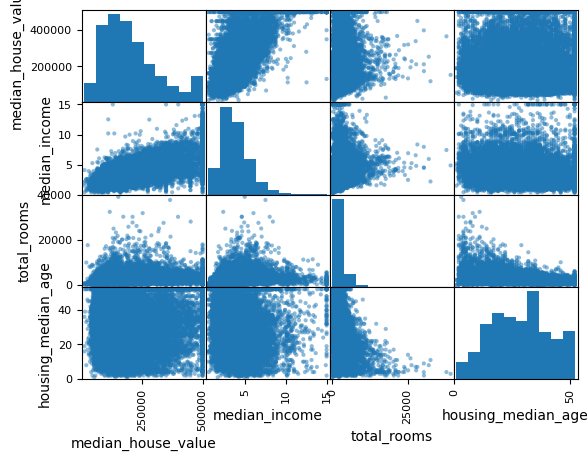

In [12]:
#scatter matrix from pandas
from pandas.plotting import scatter_matrix

attributes=['median_house_value','median_income','total_rooms','housing_median_age']

scatter_matrix(data[attributes])

<Axes: xlabel='median_income', ylabel='median_house_value'>

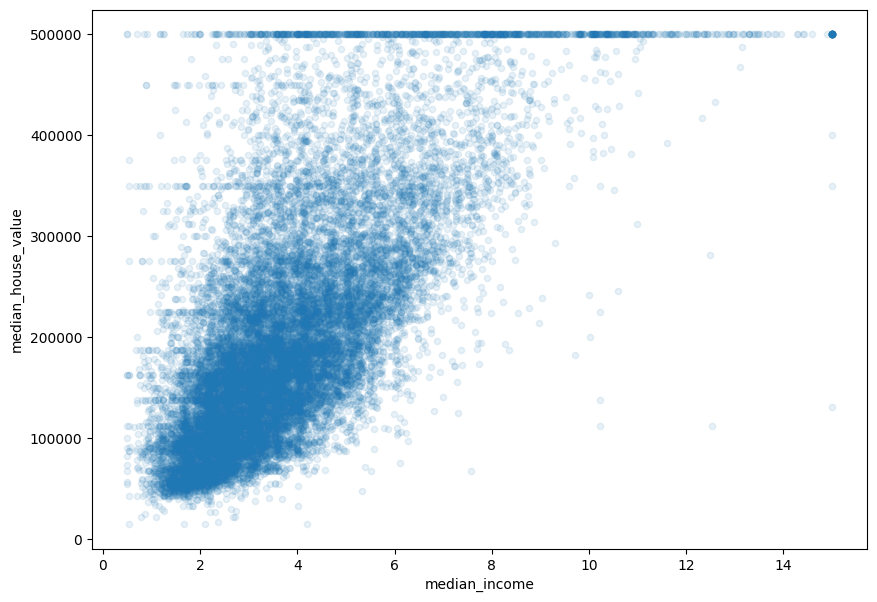

In [13]:
data.plot(kind='scatter',
          x='median_income',
          y='median_house_value',
          figsize=(10,7),
          alpha =0.1)

<Axes: >

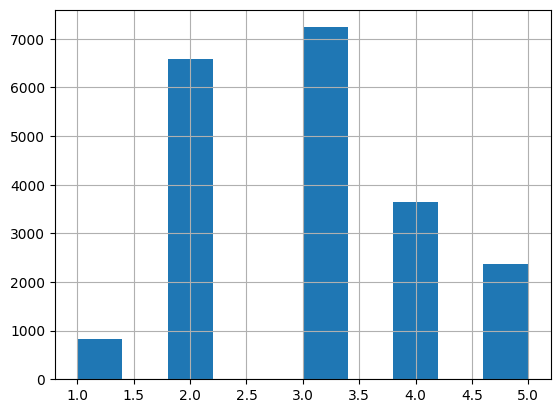

In [14]:
# lets split the data
from sklearn.model_selection import StratifiedShuffleSplit

data['income_cat'] = pd.cut(data['median_income'],
                            bins=[0.,1.5,3.0,4.5,6.,np.inf],
                            labels=[1,2,3,4,5])

data['income_cat'].hist()


In [15]:
a = StratifiedShuffleSplit(n_splits=1,
                           test_size=0.2,
                           random_state=42)
for str_train,str_test in a.split(data,data['income_cat']):
  train_set=data.loc[str_train]
  test_set = data.loc[str_test]
len(train_set),len(test_set)

(16512, 4128)

In [16]:
train_set.drop('income_cat',axis=1,inplace=True)

In [17]:
housing = train_set.drop('median_house_value',axis=1)
housing_labels = train_set['median_house_value']

## Prepare the Data for Machine Leaning Algorithms

In [18]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [19]:
housing_num = housing.drop('ocean_proximity',axis=1)
imputer.fit(housing_num)
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [20]:
housing.median().values

<ipython-input-20-248e8781fbf3>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  housing.median().values


array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [21]:
X = imputer.transform(housing_num)

In [22]:
from sklearn.preprocessing import OneHotEncoder
hot_encoder = OneHotEncoder()
housing_cat_1hot = hot_encoder.fit_transform(housing[['ocean_proximity']])
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [23]:
hot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [24]:
housing_num.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [25]:
from sklearn.base import BaseEstimator, TransformerMixin

room_ix,bed_ix,population_ix,housholds_ix=3,4,5,6

class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
  def __init__(self,add_bedrooms_per_room=True):
    self.add_bedrooms_per_room=add_bedrooms_per_room

  def fit(self,X,y=None):
    return self

  def transform(self,X,y=None):
    rooms_per_houshold = X[:,room_ix]/X[:,housholds_ix]
    population_per_household=X[:,population_ix]/X[:,housholds_ix]
    if self.add_bedrooms_per_room:
      bedrooms_per_room = X[:,bed_ix]/X[:,room_ix]
      return np.c_[X,rooms_per_houshold,population_per_household,bedrooms_per_room]
    else:
      return np.c_[X,rooms_per_houshold,population_per_household]


In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
     ('attribs_adder',CombinedAttributesAdder()),
     ('std_scaler',StandardScaler()),
])

In [27]:
from sklearn.compose import ColumnTransformer


In [28]:
num_attrbs = list(housing.select_dtypes(exclude=['object']).columns)
cat_attrbs = list(housing.select_dtypes(include=['object']).columns)
num_attrbs,cat_attrbs

(['longitude',
  'latitude',
  'housing_median_age',
  'total_rooms',
  'total_bedrooms',
  'population',
  'households',
  'median_income'],
 ['ocean_proximity'])

In [29]:
full_pipeline = ColumnTransformer([
    ('num',num_pipline,num_attrbs),
    ('cat',hot_encoder,cat_attrbs)
])

In [30]:
housing_prepared = full_pipeline.fit_transform(housing)

In [31]:
type(housing_prepared)

numpy.ndarray

## Select and Train a Model

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(
    housing_prepared,
    housing_labels
)
housing_line_predictions = lin_reg.predict(housing_prepared)

lin_mse = mean_squared_error(housing_line_predictions, housing_labels)
line_rmse = np.sqrt(lin_mse)
line_rmse

68627.87390018745

In [33]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()

tree_reg.fit(housing_prepared,
             housing_labels)

tree_predict = tree_reg.predict(housing_prepared)

tree_mse = mean_squared_error(tree_predict,housing_labels)

tree_rmse = np.sqrt(tree_mse)

tree_rmse

0.0

In [34]:
from sklearn.model_selection import cross_val_score

tree_crvs = cross_val_score(tree_reg,
                            housing_prepared,
                            housing_labels,
                            scoring='neg_mean_squared_error',
                            cv=10)
tree_rcrvs = np.sqrt(-tree_crvs)

def display_scores(scores):
  print('Scores: ',scores)
  print('Mean: ',scores.mean())
  print('Standard Deviation: ',scores.std())
display_scores(tree_rcrvs)

Scores:  [72671.54452451 71114.40340885 69678.77725279 72783.66553722
 70127.90179706 78387.51550222 69757.61573595 72258.56339176
 67254.82675905 71576.04082053]
Mean:  71561.08547299214
Standard Deviation:  2782.2231960632416


In [35]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

In [36]:
forest_reg.fit(housing_prepared,
              housing_labels)
forest_predict = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(forest_predict,housing_labels)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18668.898929486397

In [37]:
scores_val = cross_val_score(forest_reg,
                               housing_prepared,
                               housing_labels,
                               cv=10,
                               scoring='neg_mean_squared_error')

In [38]:
scores_val_rmse = np.sqrt(-scores_val)
display_scores(scores_val_rmse)

Scores:  [51542.7600999  48950.21453723 47032.27514495 52129.15053034
 47437.60699845 52052.79325754 52851.69647569 49867.6690601
 48554.2131161  53971.59792643]
Mean:  50438.99771467356
Standard Deviation:  2273.52222833907


## Fine-Tune your Model

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]


In [42]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

In [43]:
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [44]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [45]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [47]:
cvres = grid_search.cv_results_
for mean_score,params in zip(cvres['mean_test_score'],cvres['params']):
  print(np.sqrt(-mean_score),params)

63912.37880477049 {'max_features': 2, 'n_estimators': 3}
55709.252080475264 {'max_features': 2, 'n_estimators': 10}
52669.63261883952 {'max_features': 2, 'n_estimators': 30}
59621.54251716331 {'max_features': 4, 'n_estimators': 3}
52436.42437986191 {'max_features': 4, 'n_estimators': 10}
50352.18505036468 {'max_features': 4, 'n_estimators': 30}
58123.258377380196 {'max_features': 6, 'n_estimators': 3}
51997.608345183144 {'max_features': 6, 'n_estimators': 10}
49950.36615931715 {'max_features': 6, 'n_estimators': 30}
59184.89871060357 {'max_features': 8, 'n_estimators': 3}
52282.259553572636 {'max_features': 8, 'n_estimators': 10}
50244.176773572326 {'max_features': 8, 'n_estimators': 30}
62100.40467837871 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53798.22863450733 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59153.04325231577 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52391.12976561612 {'bootstrap': False, 'max_features': 3, 'n_estimators

In [50]:
final_model = grid_search.best_estimator_

X_test = test_set.drop('median_house_value',axis=1)
y_test = test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.fit_transform(X_test)

final_predictions=final_model.predict(X_test_prepared)

final_mse = mean_squared_error(final_predictions,y_test)

final_rmse = np.sqrt(final_mse)

final_rmse

65141.84434299139